In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

### Data Loading

In [ ]:
### Loading the bike dataset
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [373]:
### Info about the features
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [374]:
#this is the target variable which is continuous
target_variable = bike_df['cnt']

### Preprocessing on Features

In [375]:
### Dropping the two features====> 'Casual' and 'Registered'
print(bike_df.shape)
bike_df.drop(['casual', 'registered'],axis=1, inplace=True)
print(bike_df.shape)

(730, 16)
(730, 14)


#### Mapping the categorial values

In [376]:
### good for the eda and dummy encoding
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
bike_df['season_map'] = bike_df['season'].map(season_mapping)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_map
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,spring
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,spring
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,spring
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,spring


In [377]:
### Adding the new column
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
bike_df['month_map'] = bike_df['mnth'].map(month_map)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_map,month_map
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,spring,January
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,spring,January
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,January
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,spring,January
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,spring,January


In [378]:
### creating the dummy variable for the season variable
bike_df = pd.get_dummies(bike_df,columns=['season_map'],prefix='season')

#### Checking the missing values

### EDA


In [379]:
bike_df.isnull().sum()
# as we can see there are no null values

instant          0
dteday           0
season           0
yr               0
mnth             0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp            0
hum              0
windspeed        0
cnt              0
month_map        0
season_fall      0
season_spring    0
season_summer    0
season_winter    0
dtype: int64

#### Checking the datetime formats

In [380]:
### here the type is string , so we need to convert this to datetime
type(bike_df.dteday[0])

str

In [381]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],format='%d-%m-%Y', dayfirst=True)

In [382]:
type(bike_df.dteday[0])

pandas._libs.tslibs.timestamps.Timestamp

In [383]:
#### Checking the statistics
bike_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647


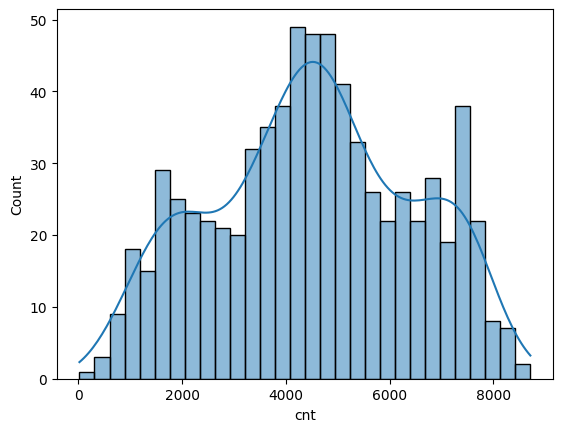

In [384]:
### Checking the distribution of the target variable
sns.histplot(bike_df['cnt'], bins=30, kde=True)
plt.show()

#### Univariate Analysis


In [385]:
#### extracting the numerical variables
numerical_features = bike_df.select_dtypes(include=['number']).columns.tolist()

In [386]:
categorical_features = ['season', 'weathersit', 'mnth', 'weekday', 'holiday', 'workingday']

In [387]:
numerical_features = [i for i in numerical_features if i not in categorical_features]

In [388]:
categorical_features, numerical_features

(['season', 'weathersit', 'mnth', 'weekday', 'holiday', 'workingday'],
 ['instant', 'yr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'])

In [389]:
### removing the target variable:
numerical_features.remove('cnt')


##### Plotting the distribution

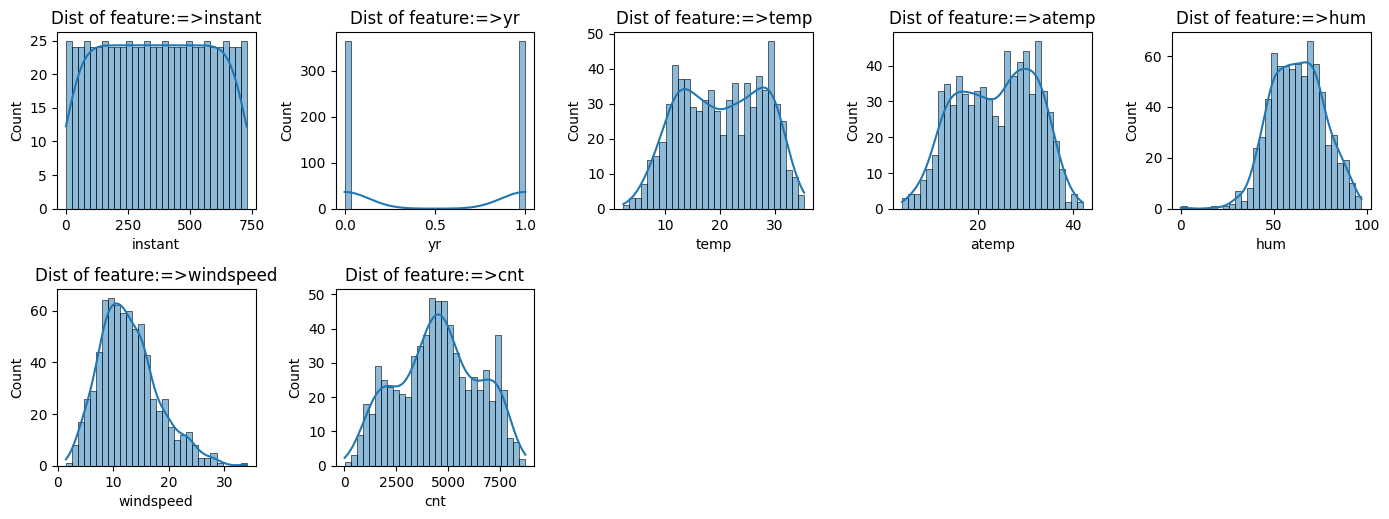

In [390]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_features + ['cnt']):
    plt.subplot(4, 5, i + 1)
    sns.histplot(bike_df[col], bins=30, kde=True)
    plt.title(f"Dist of feature:=>{col}")
plt.tight_layout()
plt.show()

##### Plotting the box plot(to detect the outliers)

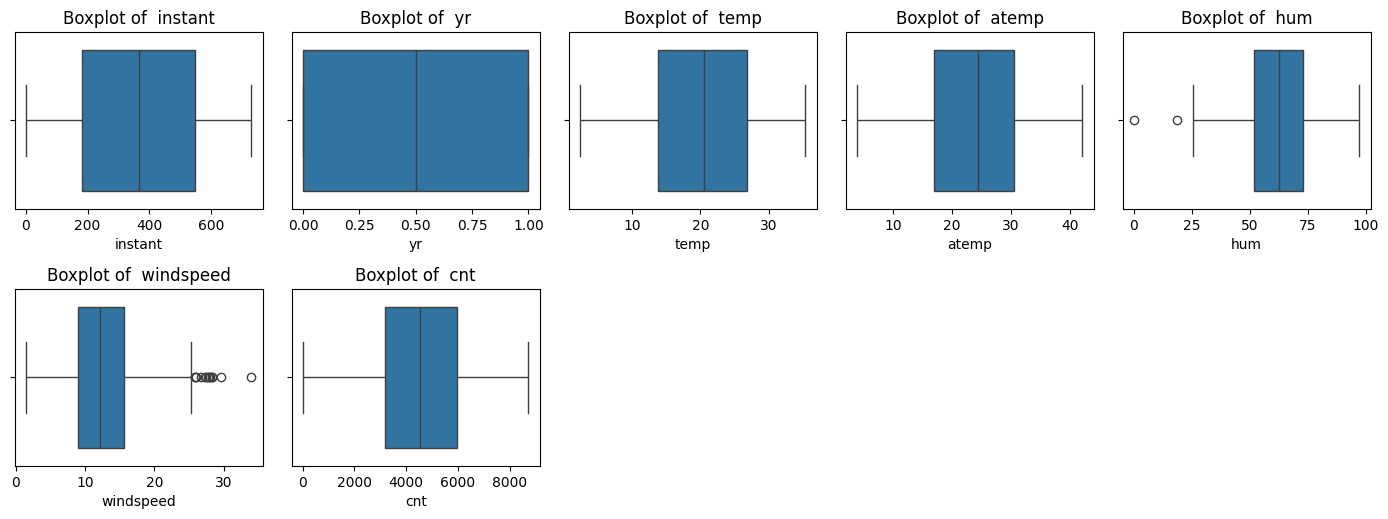

In [391]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_features + ['cnt']):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(x=bike_df[col])
    plt.title(f"Boxplot of  {col}")
plt.tight_layout()
plt.show()

##### Bar plots for categorical features

/var/folders/v0/x5hlj58d7vq24l0blx8q89780000gp/T/ipykernel_73955/4026496528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bike_df[col], palette="coolwarm")
/var/folders/v0/x5hlj58d7vq24l0blx8q89780000gp/T/ipykernel_73955/4026496528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bike_df[col], palette="coolwarm")
/var/folders/v0/x5hlj58d7vq24l0blx8q89780000gp/T/ipykernel_73955/4026496528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bike_df[col], palette="coolwarm")
/var/folders/v0/x5hlj58d7vq24l0blx8q89780000gp/T/

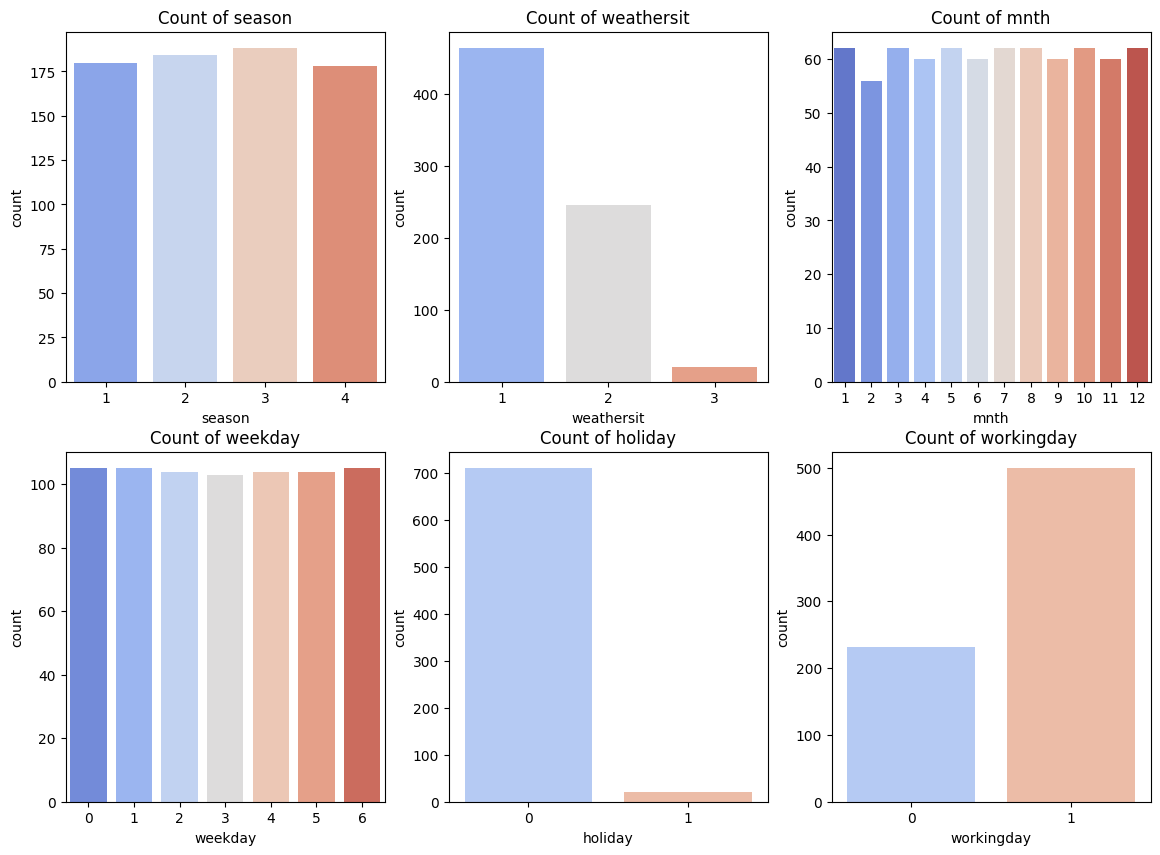

In [392]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=bike_df[col], palette="coolwarm")
    plt.title(f"Count of {col}")

##### Summary of Univariate variables:
* Numerical Features:
    1. Humidity and wind speed show some extreme values, indicating potential outliers.
* Categorical Features
    1. season : Even distribution across the four seasons.
    2. weather : Most days fall into 1 (clear), while 3 (bad weather) is rare.
    3. workingday : More working days (1) than non-working days.
    4. month : No specific trend, it can be seasonal




#### Bivariate analysis

##### Correlation 

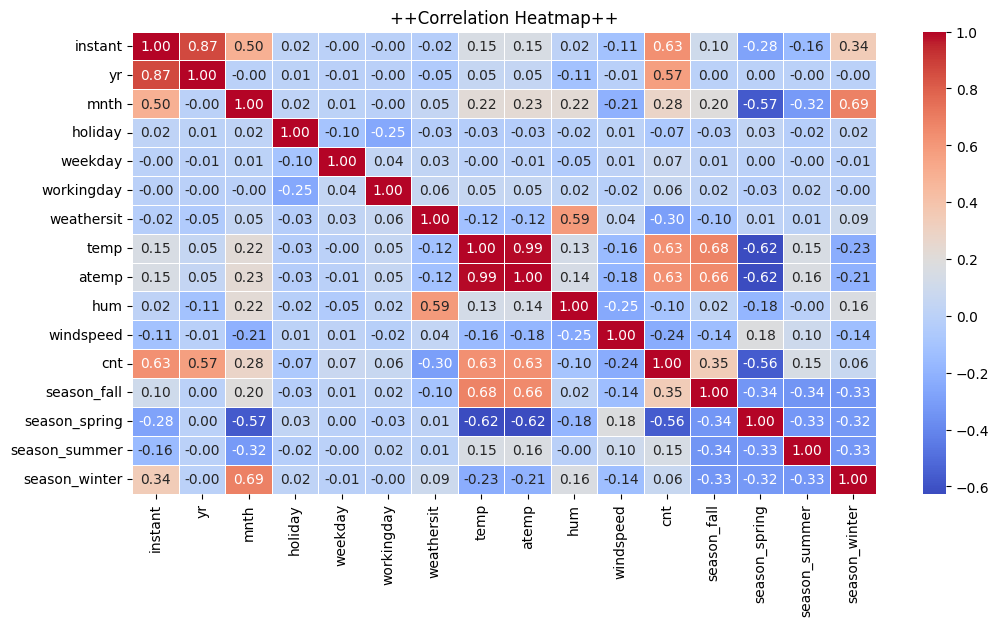

In [393]:
updated_df = bike_df.drop('season',axis=1)
plt.figure(figsize=(12, 6))
sns.heatmap(updated_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("++Correlation Heatmap++")
plt.show()

##### Scatter plot


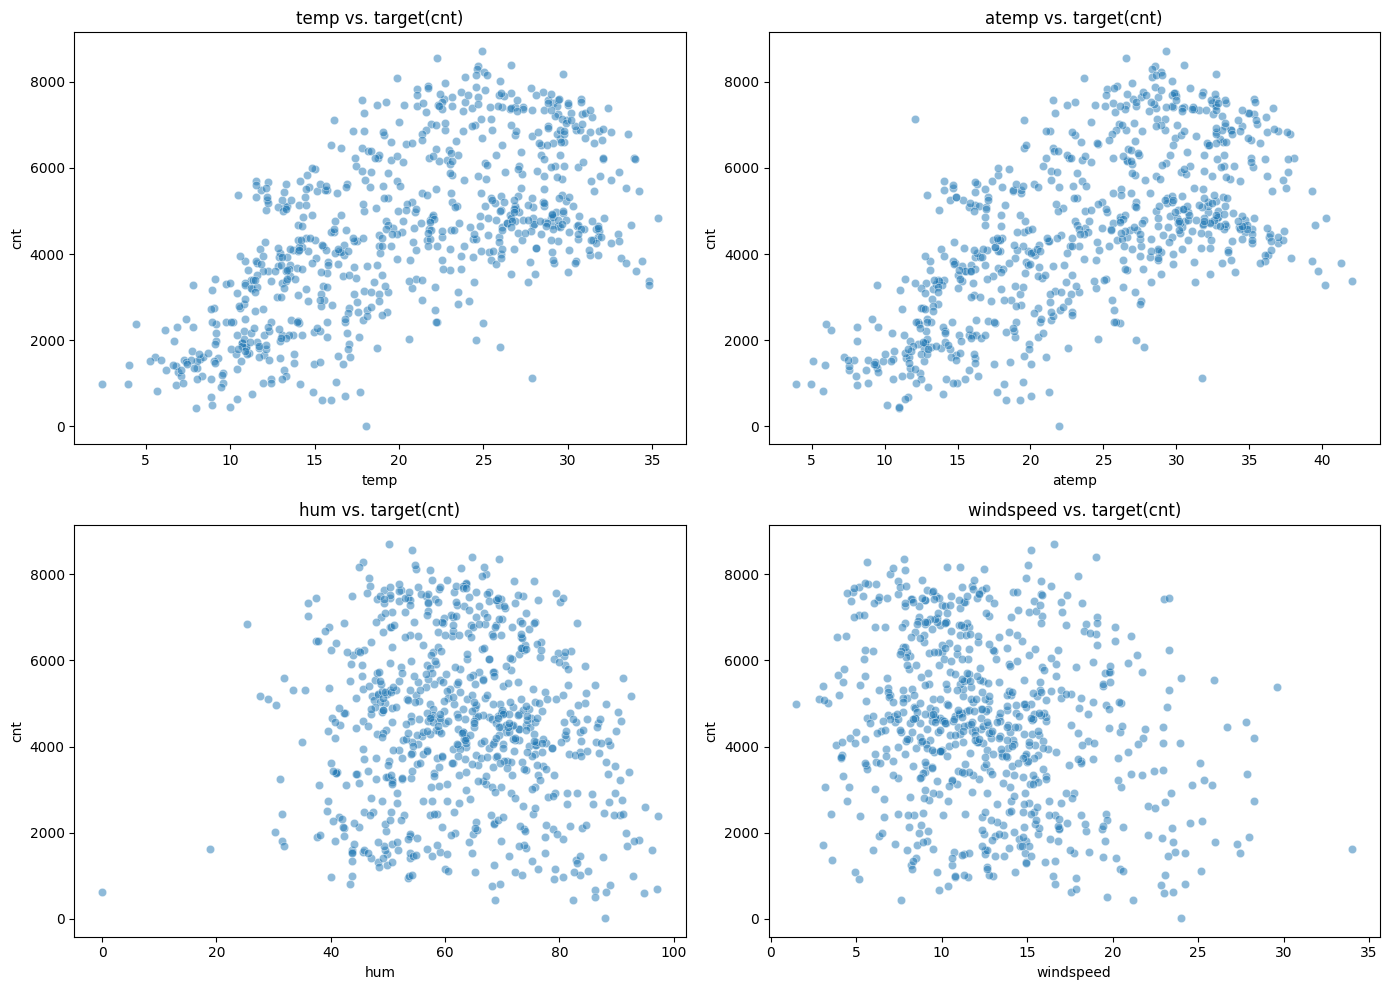

In [394]:
num_features = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=updated_df[col], y=updated_df['cnt'], alpha=0.5)
    plt.title(f"{col} vs. target(cnt)")

plt.tight_layout()
plt.show()

/var/folders/v0/x5hlj58d7vq24l0blx8q89780000gp/T/ipykernel_73955/214030242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bike_df[col], y=bike_df['cnt'], palette="coolwarm")
/var/folders/v0/x5hlj58d7vq24l0blx8q89780000gp/T/ipykernel_73955/214030242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bike_df[col], y=bike_df['cnt'], palette="coolwarm")
/var/folders/v0/x5hlj58d7vq24l0blx8q89780000gp/T/ipykernel_73955/214030242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=bike_df[col], y=bike_df['cnt'], palette="coolwarm")
/var

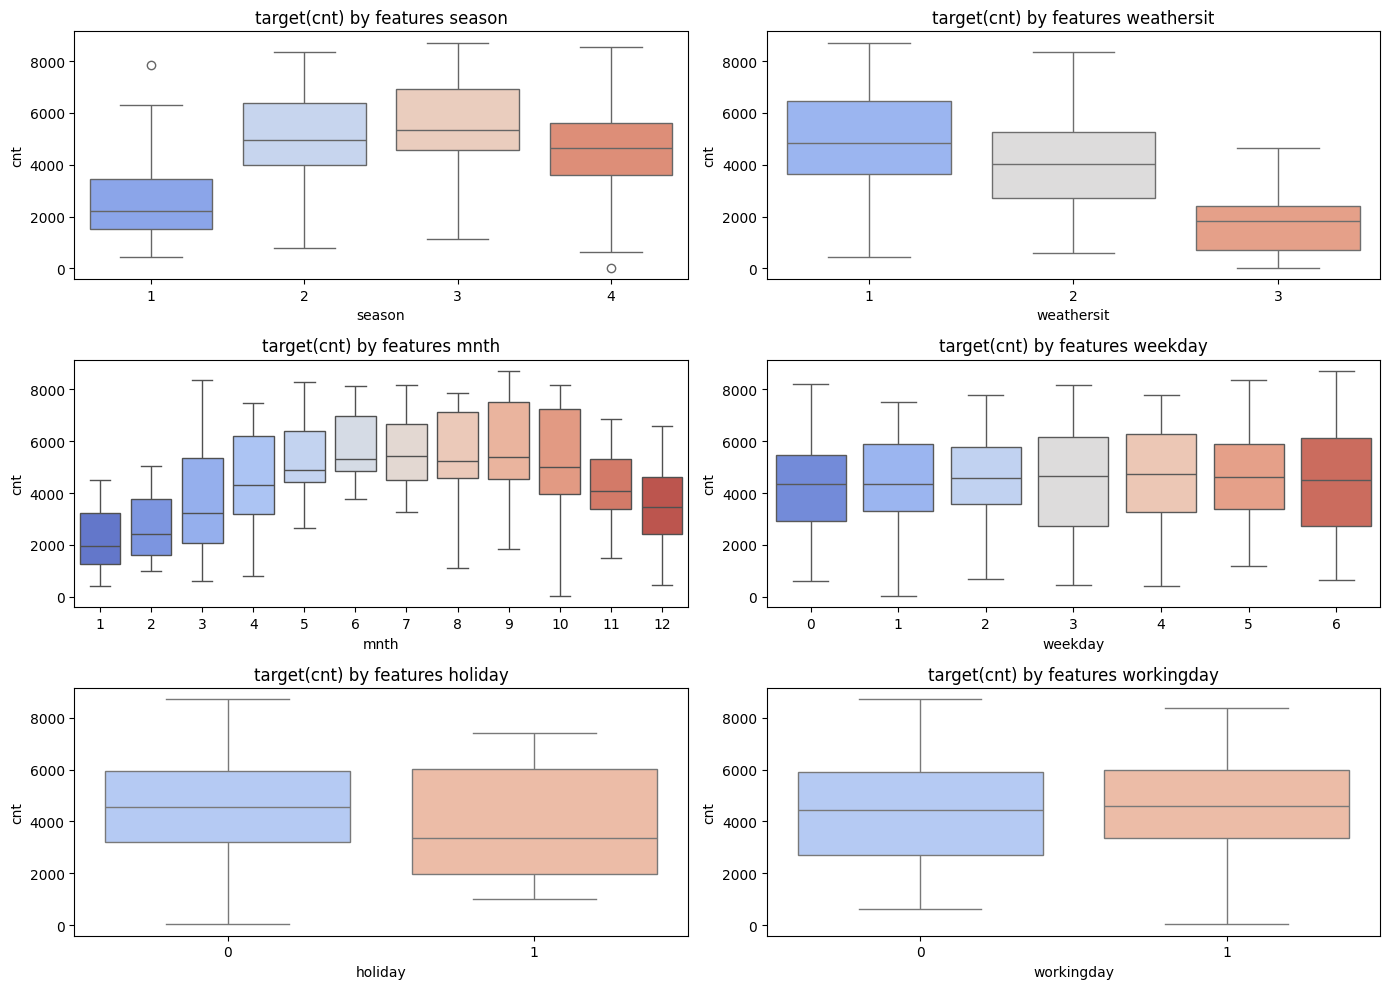

In [395]:
categorical_features = ['season', 'weathersit', 'mnth', 'weekday', 'holiday', 'workingday']

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=bike_df[col], y=bike_df['cnt'], palette="coolwarm")
    plt.title(f"target(cnt) by features {col}")

plt.tight_layout()
plt.show()

##### summary:
* Corrleation
    1. temp & cnt → Strong positive correlation
    2. atemp & cnt → Similar to temp, highly correlated
    3. hum & cnt → Slight negative correlation
    4. windspeed & cnt → Weak negative correlation
* Scatter plot analysis:
    1. Higher temperature leads to more rentals.
    2. Humidity & windspeed don’t show strong trends.
    3. Extreme temperatures affect bike rentals negatively.
* Box plot analysis:
    1. Season: Spring has the lowest rentals, Summer & Fall peak.
    2. Weather (weathersit): Clear weather (1) has highest rentals.
    3. Month: Follows a seasonal trend, peaking in summer.

#### Multi variate analysis

##### Pairplot

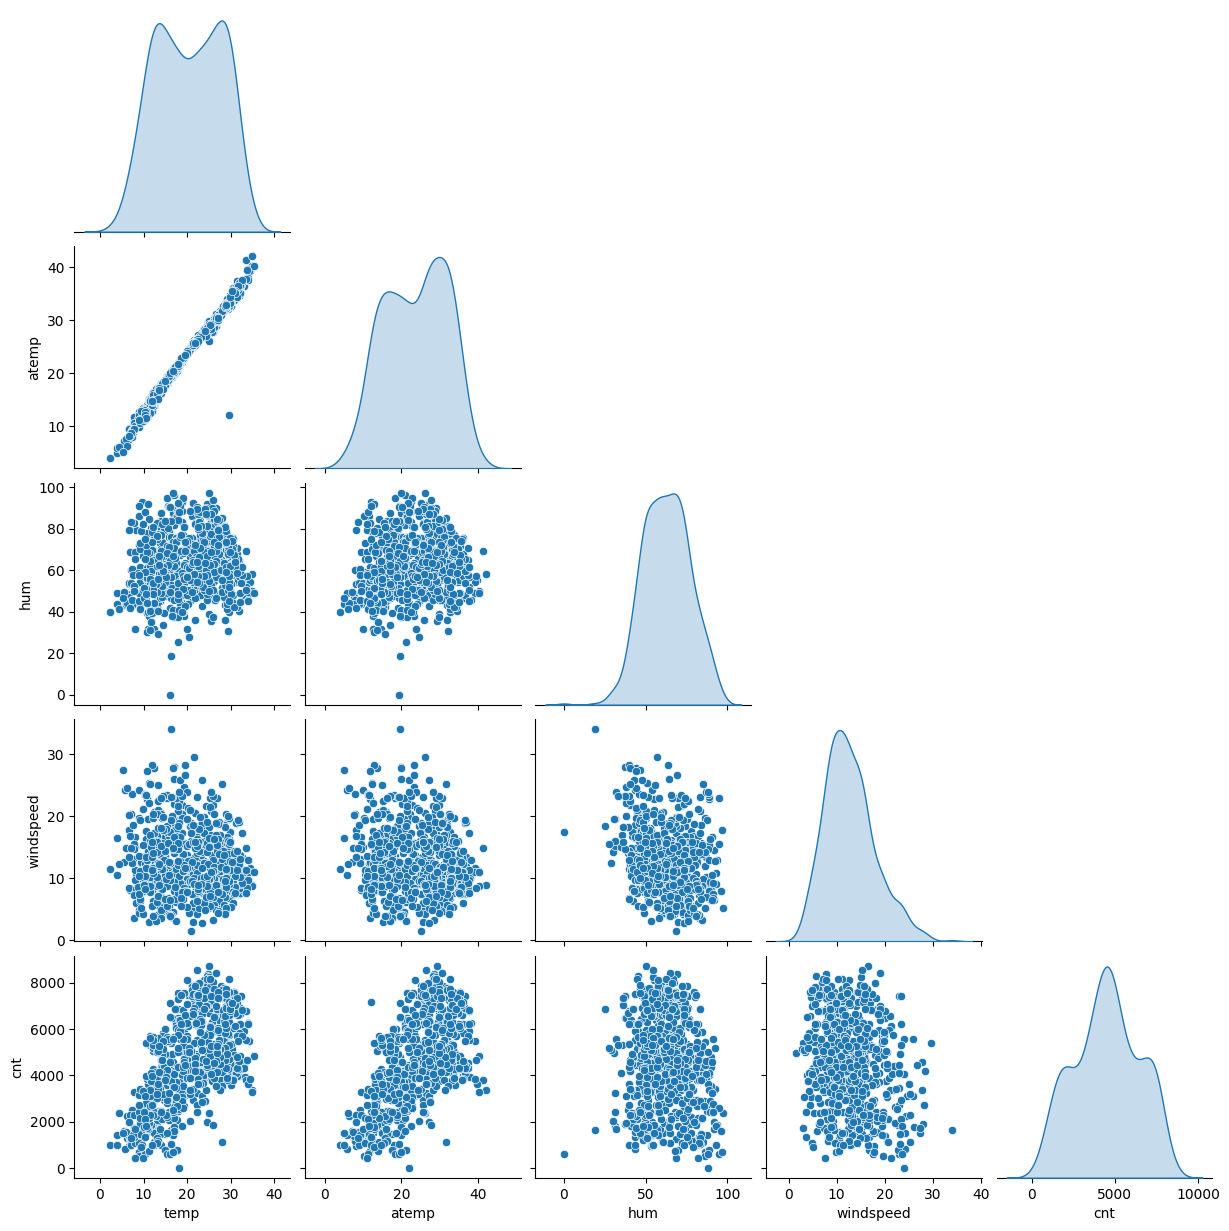

In [396]:
num_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(bike_df[num_features], diag_kind="kde", corner=True)
plt.show()

##### Variance inflation factor 
if less than 10 we consider those features

In [95]:
_temp = bike_df[['temp', 'atemp', 'hum', 'windspeed']]

In [97]:
vif_data = pd.DataFrame()
vif_data["Feature"] = _temp.columns
vif_data["VIF"] = [variance_inflation_factor(_temp.values, i) for i in range(len(_temp.columns))]

In [98]:
vif_data.head()

,Feature,VIF
0,temp,488.306256
1,atemp,542.888840
2,hum,11.071034
3,windspeed,4.678072


In [99]:
### Here we can see the vif is larger than 10 so removing the atemp and calculating again
tmp_reduced = bike_df[['temp', 'hum', 'windspeed']]

In [100]:
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = tmp_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(tmp_reduced.values, i) for i in range(tmp_reduced.shape[1])]
vif_data_reduced

,Feature,VIF
0,temp,7.132959
1,hum,9.052993
2,windspeed,4.677354


### Train and test split

In [328]:
X = bike_df.drop(columns=['cnt', 'season','atemp'])  # Drop target and unnecessary columns
X = pd.get_dummies(X, columns=['weathersit', 'weekday'], drop_first=True)
y = bike_df['cnt']

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [330]:
print(f"Train set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Train set shape: (584, 22), (584,)
Test set shape: (146, 22), (146,)


### Min max scaling

In [331]:
scaler = MinMaxScaler()

In [332]:
# Drop datetime column before scaling
X_train = X_train.drop(columns=['dteday','month_map','instant'])
X_test = X_test.drop(columns=['dteday','month_map','instant'])

In [333]:
scale_cols = ['temp', 'hum', 'windspeed']
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [334]:
X_train.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
247,0,9,1,0,0.765327,0.814513,0.475900,True,False,False,False,True,False,True,False,False,False,False,False
335,0,12,0,1,0.317788,0.644911,0.195963,False,False,False,True,False,False,False,False,False,False,True,False
702,1,12,0,1,0.519232,0.756118,0.379454,False,False,False,True,False,False,False,True,False,False,False,False
440,1,3,0,0,0.566998,0.778874,0.220845,False,True,False,False,True,False,False,False,False,False,False,True
136,0,5,0,1,0.626185,0.863461,0.637592,False,False,True,False,True,False,False,True,False,False,False,False


### Feature Selection

#### RFE

In [335]:
lr = LinearRegression()
#only selecting the 10 variables
rfe = RFE(estimator=lr, n_features_to_select=X_train.shape[1])

In [336]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=19)

In [337]:
#getting the selected features
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['yr', 'mnth', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_2', 'weathersit_3', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [338]:
# Train with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected.shape, X_test_selected.shape


((584, 19), (146, 19))

#### Calculating the p_values

In [ ]:
X_train_const = sm.add_constant(X_train)
X_train_const = X_train_const.astype(int)

In [233]:

ols_model = sm.OLS(y_train, X_train_const).fit()
p_values = ols_model.pvalues
p_values

const            2.393699e-60
yr               2.661967e-94
mnth             2.869542e-01
holiday          2.071234e-01
workingday       8.750017e-06
temp             1.815725e-01
hum              8.392639e-04
windspeed        9.805858e-01
season_fall      5.957177e-62
season_spring    4.805637e-38
season_summer    9.639208e-44
season_winter    8.627456e-15
weathersit_2     5.776004e-13
weathersit_3     3.824485e-28
weekday_1        1.970428e-01
weekday_2        9.338940e-01
weekday_3        1.631475e-01
weekday_4        7.509047e-01
weekday_5        3.781362e-01
weekday_6        3.983603e-03
dtype: float64

In [249]:
significant_value = 0.05
final_features = []
#considering only those features which have p_values less than 0.05
for i,j in zip(p_values.index,p_values.values):
    j = float(f"{j:.20f}")
    if j<=significant_value:
        final_features.append(i)
final_features.remove('const')
#final features after based on the p_values
final_features

['yr',
 'workingday',
 'hum',
 'season_fall',
 'season_spring',
 'season_summer',
 'season_winter',
 'weathersit_2',
 'weathersit_3',
 'weekday_6']

In [250]:
### using those features in training and testing dataset
X_train = X_train[final_features]
X_test = X_test[final_features]


### Fitting the model

In [ ]:
def adjusted_r2_score(X,r2):
    """
    Calculate the Adjusted R-Squared score
    """
    n, p = X.shape
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adjusted_r2

#### Fitting the model after the RFE

In [339]:
# Train Linear Regression
lr.fit(X_train_selected, y_train)

LinearRegression()

In [340]:
# Predict on test set
y_pred = lr.predict(X_test_selected)

In [341]:
#mse and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [342]:
print(f'final mse score after selecting the features using RFE:  {mse}')
print(f'final r2 score after selecting the features using RFE:  {r2}')
adjusted_r2 = adjusted_r2_score(X_train_selected,r2)
print(f'final adjusted r2 score after selecting the features using RFE: {adjusted_r2}')

final mse score after selecting the features using RFE:  514209.2589527438
final r2 score after selecting the features using RFE:  0.8497712533195576
final adjusted r2 score after selecting the features using RFE: 0.8447103558250038


#### Fitting the model after the RFE and p_values


In [343]:
#interesection of RFE and p_values features with VIF(as already removed the feature in the Multivariate analysis)
updated_features = list(set(final_features) & set(selected_features))
updated_features

['season_spring',
 'weathersit_3',
 'season_summer',
 'hum',
 'season_fall',
 'weekday_6',
 'season_winter',
 'weathersit_2',
 'workingday',
 'yr']

In [344]:
X_train_updated = X_train[updated_features]
X_test_updated = X_test[updated_features]

In [345]:
# Train Linear Regression
lr.fit(X_train_updated, y_train)

LinearRegression()

In [348]:
# Predict on test set
y_pred = lr.predict(X_test_updated)

In [351]:
#mse and r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [352]:
print(f'final mse score after selecting the features using RFE:  {mse}')
print(f'final r2 score after selecting the features using RFE:  {r2}')
adjusted_r2 = adjusted_r2_score(X_train_selected,r2)
print(f'final adjusted r2 score after selecting the features using RFE: {adjusted_r2}')

final mse score after selecting the features using RFE:  514209.2589527438
final r2 score after selecting the features using RFE:  0.7690338603831427
final adjusted r2 score after selecting the features using RFE: 0.7612530861761918


In [410]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0)
}
_coef = {}
# Final selected features for training the models and evaluate
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    _coef[name] = np.abs(model.coef_)
    y_pred = model.predict(X_test[X_train_selected.columns])  # Use only selected features
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = adjusted_r2_score(X_train_selected,r2)
    print(f"{name}:")
    print(f" - rmse: {rmse:.2f}")
    print(f" - r2 score: {r2:.2f}\n")
    print(f" - adjusted r2 score: {adjusted_r2:.2f}\n")


Linear Regression:
 - rmse: 717.08
 - r2 score: 0.85

 - adjusted r2 score: 0.84

Ridge Regression:
 - rmse: 715.42
 - r2 score: 0.85

 - adjusted r2 score: 0.85



/Users/utkarsh.sanwal/opt/anaconda3/envs/py_env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/utkarsh.sanwal/opt/anaconda3/envs/py_env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Summary
##### r2 score: 0.85
##### adjusted r2 score: 0.85

#### Feature importance

In [413]:
_coef.get('Linear Regression')

array([1989.53186078,   28.67031331,  277.34192927,  348.5471918 ,
       4111.77156222, 1043.58928936, 1142.90814938,   23.36267252,
        999.0224358 ,  229.98583475,  792.39927356,  434.65020498,
       2119.7703982 ,  125.33954407,   40.74381588,  101.66168851,
         45.57377455,   90.05315941,  456.30464173])

In [416]:
feature_importance = pd.DataFrame({
    "Feature": X_train_selected.columns,
    "Coefficient": _coef.get('Linear Regression')
})
top_3_features = feature_importance.sort_values(by="Coefficient", ascending=False).head(3)
top_3_features

,Feature,Coefficient
4,temp,4111.771562
12,weathersit_3,2119.770398
0,yr,1989.531861


#### Assumptions of linear regression

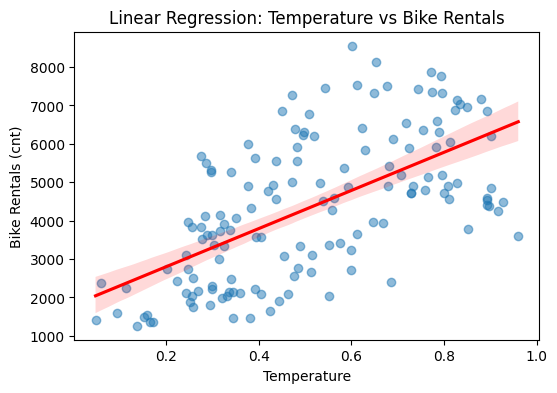

In [405]:
# 1. Scatter plot with regression line, ryt now checking with one variable

plt.figure(figsize=(6, 4))
sns.regplot(x=X_test["temp"], y=y_test, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals (cnt)")
plt.title("Linear Regression: Temperature vs Bike Rentals")
plt.show()

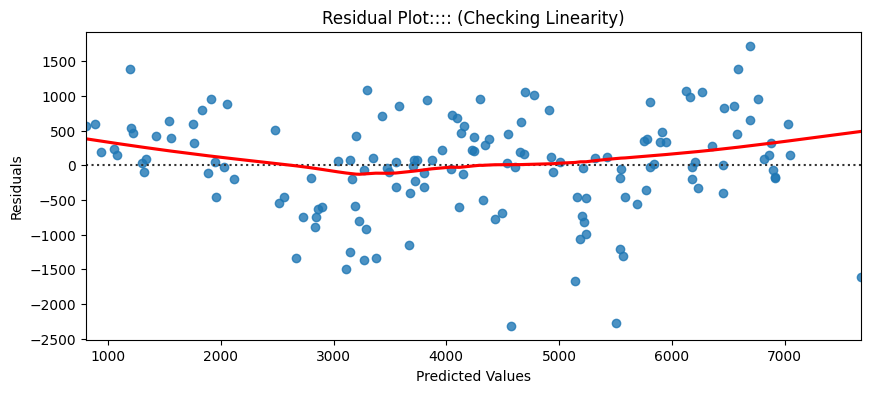

In [401]:
# 2. Residual Plot
plt.figure(figsize=(10,4))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot:::: (Checking Linearity)")
plt.show()

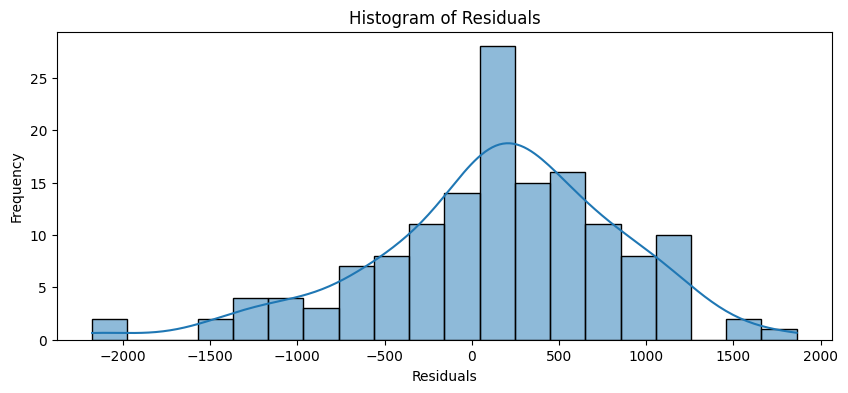

In [402]:
# 3. Histogram of residuals
plt.figure(figsize=(10,4))
sns.histplot(y_test - y_pred, bins=20, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()